
### Applying a linear regression algorithm to real world data with the purpose of predicting a potential number of "likes" on a future post of a Cosmetics Brand on Facebook.
Dataset acquired from: https://archive.ics.uci.edu/ml/datasets/Facebook+metrics


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
##
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
##
from sklearn.neighbors import KNeighborsRegressor

## Insertion of the dataset and data exploration.

In [ ]:
fb=pd.read_csv('data/Facebook_Cosmetics_Brand.csv',';')

In [3]:
fb.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

##### Checking for null values.

In [4]:
fb.isnull().any()

Page total likes                                                       False
Type                                                                   False
Category                                                               False
Post Month                                                             False
Post Weekday                                                           False
Post Hour                                                              False
Paid                                                                    True
Lifetime Post Total Reach                                              False
Lifetime Post Total Impressions                                        False
Lifetime Engaged Users                                                 False
Lifetime Post Consumers                                                False
Lifetime Post Consumptions                                             False
Lifetime Post Impressions by people who have liked your Page           False

##### Sum of null values.

In [5]:
fb.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

##### Showing dataset's shape.

In [6]:
fb.shape

(500, 19)

##### Dropping null values.

In [7]:
fb=fb.dropna()

##### Showing dataset's shape again.

In [8]:
fb.shape

(495, 19)

##### Showing the first five entries of the dataset.

In [9]:
fb.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


##### Describing the columns of the table.


In [10]:
fb.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,123173.268687,1.886869,7.028283,4.133333,7.844444,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,16203.818031,0.853268,3.304274,2.030735,4.385064,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112324.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


##### Replacing the values of type Object with unique int32 values and creating a new column "Type_c" with those values to assist later into the data analysis of the dataset. 
##### "Photo"=0, "Status"=1

In [11]:
TypeString = fb.Type
TypeVal = fb.Type.unique()
TypeValCount = len(TypeVal)
Type_dict = {}
for i in range(0,TypeValCount):
    Type_dict[TypeVal[i]] = i
fb["Type_c"] = fb.Type.map(Type_dict).astype(int)

In [12]:
fb.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_c
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,0
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,1
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,0
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,0
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,0


In [13]:
fb.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

##### Deleting unnecessary columns.

In [14]:
fb.drop(labels = ['Type'], axis = 1, inplace = True)

In [15]:
fb.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_c
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,0
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,1
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,0
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,0
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,0


### Data splitting.

##### A correlation matrix too assist me into picking the right "in's" for my purposes.

<AxesSubplot:>

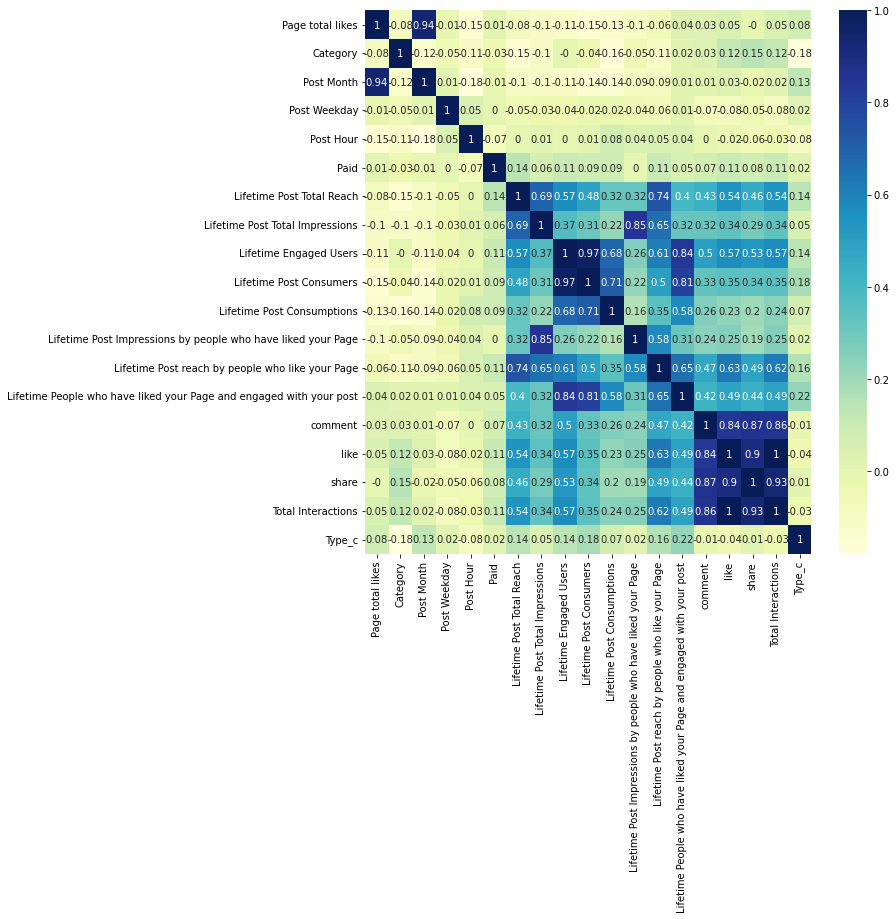

In [16]:
correlation_matrix = fb.corr().round(2)
f, ax = plt.subplots(figsize=(10,10))
#### Χρήση απεικόνισης μορφής heatmap της βιβλιοθήκης seaborn 
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu')

##### My y_vector is column "like" My x_vector contains all those column with a correlation percentage >= 0.49.

In [17]:
X = fb[['Total Interactions', 'share', 'comment','Lifetime People who have liked your Page and engaged with your post',
        'Lifetime Post reach by people who like your Page','Lifetime Engaged Users','Lifetime Post Total Reach']]
y= fb['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [18]:
print("X_train dimensions:", X_train.shape)
print("y_train dimensions:", y_train.shape)

print("X_test dimensions:", X_test.shape)
print("y_test dimensions:", y_test.shape)

X_train dimensions: (346, 7)
y_train dimensions: (346,)
X_test dimensions: (149, 7)
y_test dimensions: (149,)


### Applying Linear Regression algorithm. 

In [19]:
linregressor = LinearRegression()

#### Training my model.

In [20]:
linregressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_test = linregressor.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# root mean square error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
# r-squared scor
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Model's score with test data:")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

Model's score with test data:
--------------------------------------
Mean Absolute Error=  1.5689766081577591e-12
Root Mean Squared Error =  2.915849445974614e-12
R2 score =  1.0


#### Plotting real result - expected result

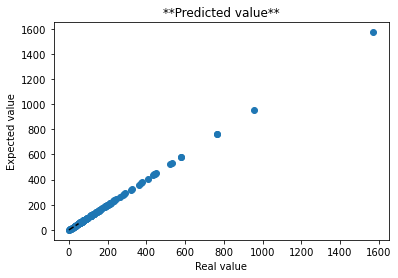

In [22]:
plt.scatter(y_test, y_pred_test)

plt.plot([0, 50], [0, 50], '--k')

plt.title('**Predicted value**')
plt.xlabel('Real value')
plt.ylabel('Expected value')
plt.show()

##### Judging by the R2 score I can see that my model is overfitted, so re-adjusting now.


In [23]:
X = fb[['Total Interactions', 'share', 'comment','Lifetime People who have liked your Page and engaged with your post',
        'Lifetime Post reach by people who like your Page','Lifetime Engaged Users','Lifetime Post Total Reach',
       'Lifetime Post Total Impressions','Lifetime Post Consumers']]
y= fb['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [24]:
print("X_train dimensions:", X_train.shape)
print("y_train dimensions:", y_train.shape)

print("X_test dimensions:", X_test.shape)
print("y_test dimensions:", y_test.shape)

X_train dimensions: (346, 9)
y_train dimensions: (346,)
X_test dimensions: (149, 9)
y_test dimensions: (149,)


In [25]:
linregressor = LinearRegression()

In [26]:
linregressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_test = linregressor.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# root mean square error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
# r-squared score
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Model's score with test data:")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

Model's score with test data:
--------------------------------------
Mean Absolute Error=  6.986210911112275e-12
Root Mean Squared Error =  9.424006632183837e-12
R2 score =  1.0


##### Even though in my x_vector were columns with a correlation percentage > 0.34, and afterwards the columns with a percentage of <= 0.49 where removed, the R2 score stayed the same.

##### Applying a different algorithm choosing as x_vector the columns with a correlation percentage >=0.49.


### Applying Random Forest Regressor.

In [28]:
X = fb[['Total Interactions', 'share', 'comment','Lifetime People who have liked your Page and engaged with your post',
        'Lifetime Post reach by people who like your Page','Lifetime Engaged Users','Lifetime Post Total Reach']]
y= fb['like']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [29]:
rfr = RandomForestRegressor(n_estimators=250)

In [30]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250)

In [31]:
y_pred = rfr.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred)
# root mean square error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# r-squared score
r2 = r2_score(y_test, y_pred)
rfr.score(X_test, y_test)

print("Model's score with test data:")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',rfr.score(X_test, y_test))

Model's score with test data:
--------------------------------------
Mean Absolute Error=  13.088375838926176
Root Mean Squared Error =  37.31647136112467
R2 score =  0.963038014395293


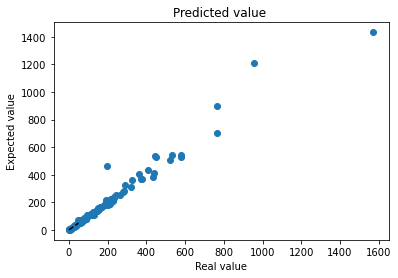

In [32]:
plt.scatter(y_test, y_pred)

plt.plot([0, 50], [0, 50], '--k')

plt.title('Predicted value ')
plt.xlabel('Real value')
plt.ylabel('Expected value')
plt.show()

##### With an R2 score of 0.95, thr Random Forest Regressor algorithm, seems to be performing better. 

### Applying KNeighbours Regressor

In [33]:
knnRegr = KNeighborsRegressor(n_neighbors=1)

In [34]:
knnRegr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [35]:
y_pred = knnRegr.predict(X_test)

In [36]:
# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred)
# root mean square error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# r-squared score 
r2 = r2_score(y_test, y_pred)
rfr.score(X_test, y_test)

print("Model's score with test data:")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',rfr.score(X_test, y_test))

Model's score with test data:
--------------------------------------
Mean Absolute Error=  130.18120805369128
Root Mean Squared Error =  316.02819303338475
R2 score =  0.963038014395293


##### The R2 Score of the last method is the same as this one, with changes in the Mean Absolute Error and the Root Mean Squared Error.

### Best algorithm for this dataset is the Random Forest Regressor algorithm.